In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import train_test_split
import pickle as pk
from sklearn.preprocessing import OneHotEncoder

In [8]:
data=pd.read_csv("rideshare_kaggle.csv.zip")
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [10]:
data.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [11]:
data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [12]:
pd.DataFrame(data["name"].unique())

,0
0,Shared
1,Lux
2,Lyft
3,Lux Black XL
4,Lyft XL
5,Lux Black
6,UberXL
7,Black
8,UberX
9,WAV


In [13]:
data['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

In [14]:
data.groupby(['cab_type','name'])['price'].sum()

cab_type  name        
Lyft      Lux              910509.50
          Lux Black       1181605.55
          Lux Black XL    1656124.55
          Lyft             492413.68
          Lyft XL          784375.20
          Shared           308929.50
Uber      Black           1130758.00
          Black SUV       1668679.50
          Taxi                  0.00
          UberPool         482184.00
          UberX            537997.00
          UberXL           863803.00
          WAV              538013.50
Name: price, dtype: float64

In [15]:
data_uber=data[data['cab_type']=='Uber']
print('The Number Of Null In data Of type Uber is :',data_uber['price'].isna().sum())
data_uber

The Number Of Null In data Of type Uber is : 55095


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
12,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,1.543616e+09,22,30,11,2018-11-30 22:13:01,America/New_York,North End,West End,Uber,...,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600
13,23f145da-f0c1-4d1f-a184-496bc003a7db,1.544698e+09,10,13,12,2018-12-13 10:50:11,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
14,357559cb-8c58-4278-a41a-e33b2e0997a3,1.544729e+09,19,13,12,2018-12-13 19:15:03,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
15,50ef1165-9d23-416c-a65c-18906207b295,1.545005e+09,23,16,12,2018-12-16 23:55:11,America/New_York,North End,West End,Uber,...,0.1252,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800
16,91c4861c-1780-42b0-bca1-bbd64a422cc3,1.544748e+09,0,14,12,2018-12-14 00:40:07,America/New_York,North End,West End,Uber,...,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [16]:
data.fillna(0,inplace=True)
print('The Number Of Null In data Of type Uber is :',data['price'].isna().sum())
data

The Number Of Null In data Of type Uber is : 0


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [17]:
data['cab_type'].value_counts()

cab_type
Uber    385663
Lyft    307408
Name: count, dtype: int64

In [18]:
#The number of trips per way
data['name'].value_counts()

name
UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: count, dtype: int64

In [19]:
#the total distance of trips
data.groupby(['cab_type','name'])['distance'].sum()

cab_type  name        
Lyft      Lux             112049.32
          Lux Black       112049.32
          Lux Black XL    112049.32
          Lyft            112049.32
          Lyft XL         112049.32
          Shared          112047.19
Uber      Black           120735.12
          Black SUV       120736.15
          Taxi            120734.23
          UberPool        120726.22
          UberX           120732.46
          UberXL          120736.15
          WAV             120736.15
Name: distance, dtype: float64

In [20]:
#total distance of company
data.groupby(['cab_type'])['distance'].sum()

cab_type
Lyft    672293.79
Uber    845136.48
Name: distance, dtype: float64

In [21]:
#total price of company
data.groupby(['cab_type'])['price'].sum()

cab_type
Lyft    5333957.98
Uber    5221435.00
Name: price, dtype: float64

In [22]:
dict={'distance':[data['distance'].min(),data['distance'].max()],'price':[data['price'].min(),data['price'].max()],'date':[data['datetime'].min(),data['datetime'].max()]}
pd.DataFrame(dict,index=['minimum','maximum'])

,distance,price,date
minimum,0.02,0.0,2018-11-26 03:40:46
maximum,7.86,97.5,2018-12-18 19:15:10


In [23]:
object=data.select_dtypes(include=object).columns
pd.DataFrame(object,columns=['String Columns'])

,String Columns
0,id
1,datetime
2,timezone
3,source
4,destination
5,cab_type
6,product_id
7,name
8,short_summary
9,long_summary


0         Morning
1         Morning
2         Morning
3         Morning
4         Morning
           ...   
693066      Night
693067      Night
693068      Night
693069      Night
693070      Night
Name: hour, Length: 693071, dtype: category
Categories (4, object): ['Morning' < 'Afternoon' < 'Evening' < 'Night']

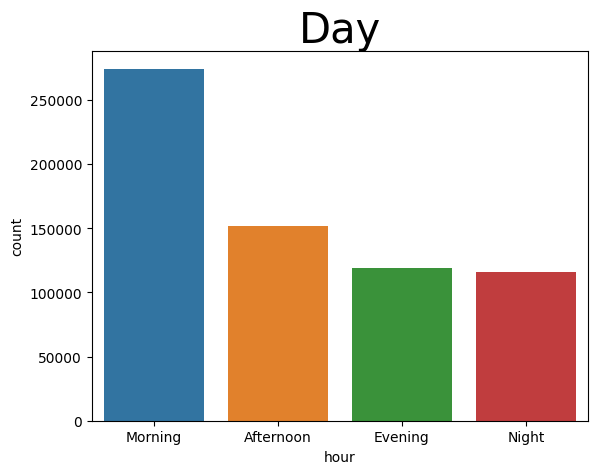

In [24]:
#Number of rides during the parts of the day
day=pd.cut(x=data['hour'],bins=[0,10,15,19,23],labels = ['Morning','Afternoon','Evening','Night'])
plt.title('Day',fontsize=30)
sns.countplot(x=day)
day

price
0.00     55095
7.00     52314
16.50    44351
10.50    40590
13.50    33707
         ...  
89.50        1
81.50        1
64.50        1
87.00        1
19.35        1
Name: count, Length: 148, dtype: int64

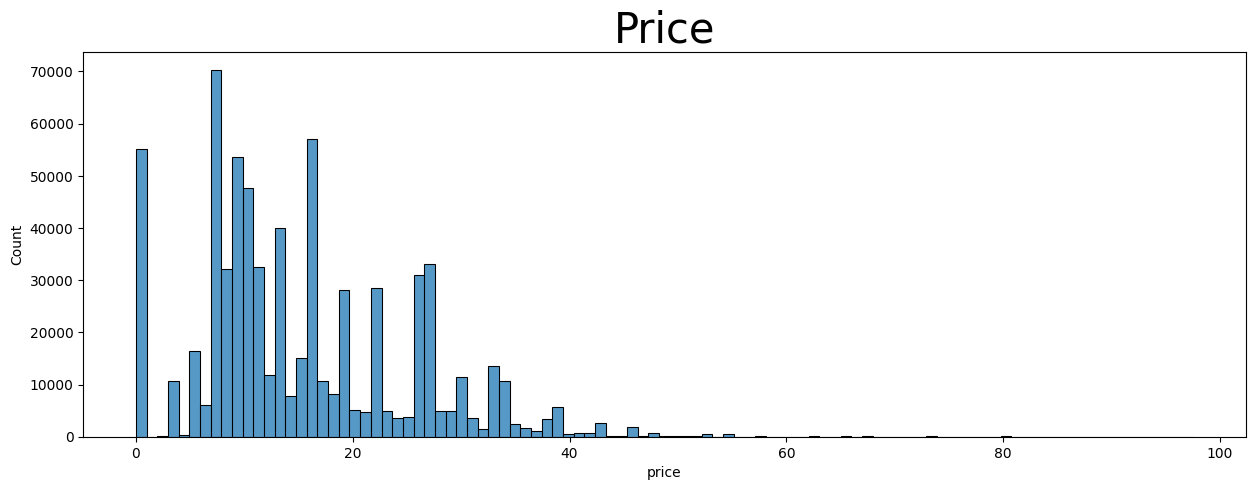

In [25]:
#show distribution of price
bins = np.linspace(data['price'].min(),data['price'].max(),100)
count=data['price'].value_counts()
plt.figure(figsize=(15,5))
plt.title('Price',fontsize=30)
sns.histplot(x='price',data=data,bins=bins)
count

hour
0     32413
23    31931
16    30384
17    30384
12    30384
13    30384
18    30384
11    30384
14    30384
10    30384
15    30383
22    29436
9     28971
2     28548
1     28548
4     28330
3     27815
21    27732
19    27555
6     27336
20    26782
5     25008
7     24936
8     24275
Name: count, dtype: int64

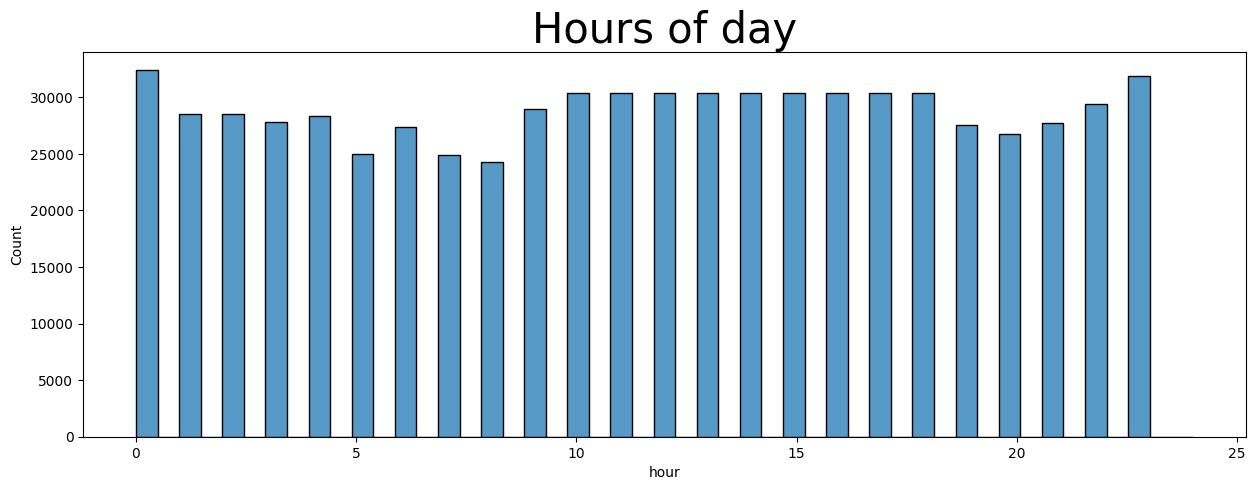

In [26]:
#show distribution of hours
bins = np.linspace(0,24)
count=data['hour'].value_counts()
plt.figure(figsize=(15,5))
plt.title('Hours of day',fontsize=30)
sns.histplot(x='hour',data=data,bins=bins)
count

day
27    76121
28    73691
29    59974
1     45240
30    45084
16    44928
15    44928
14    44928
3     44928
2     44928
17    44928
13    38531
18    36192
26    31587
4     12636
10     2773
9      1674
Name: count, dtype: int64

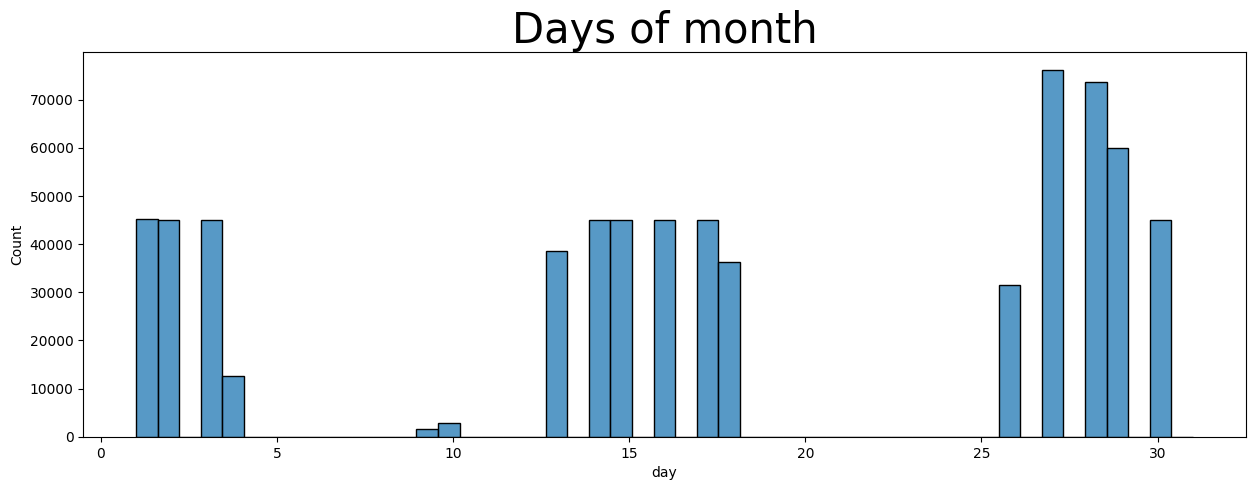

In [27]:
#show number of days in month
bins = np.linspace(1,31)
count=data['day'].value_counts()
plt.figure(figsize=(15,5))
plt.title('Days of month',fontsize=30)
sns.histplot(x='day',data=data,bins=bins)
count

([<matplotlib.patches.Wedge at 0x21c8d561a30>,
 [Text(0.6015157448084366, 0.9209662364861981, ' Overcast '),
  Text(-0.9682771805771296, 0.5219571836593542, ' Mostly Cloudy '),
  Text(-0.8085711740130453, -0.7457966589863257, ' Partly Cloudy '),
  Text(0.15987340819094384, -1.0883200325976785, ' Clear '),
  Text(0.7811518246640666, -0.7744687384420363, ' Light Rain '),
  Text(1.0022738028050777, -0.4532628643631069, ' Rain '),
  Text(1.0703385510074181, -0.253723050248378, ' Possible Drizzle '),
  Text(1.0936842301932876, -0.11770643409141135, ' Foggy '),
  Text(1.099398499913002, -0.03637222001804439, ' Drizzle ')],
 [Text(0.3280994971682381, 0.5023452199015626, '31.583%'),
  Text(-0.528151189405707, 0.2847039183596477, '21.096%'),
  Text(-0.44103882218893375, -0.4067981776289049, '18.357%'),
  Text(0.08720367719506027, -0.5936291086896428, '12.571%'),
  Text(0.4260828134531272, -0.42243749369565614, '7.923%'),
  Text(0.5466948015300424, -0.24723428965260374, '3.421%'),
  Text(0.58382

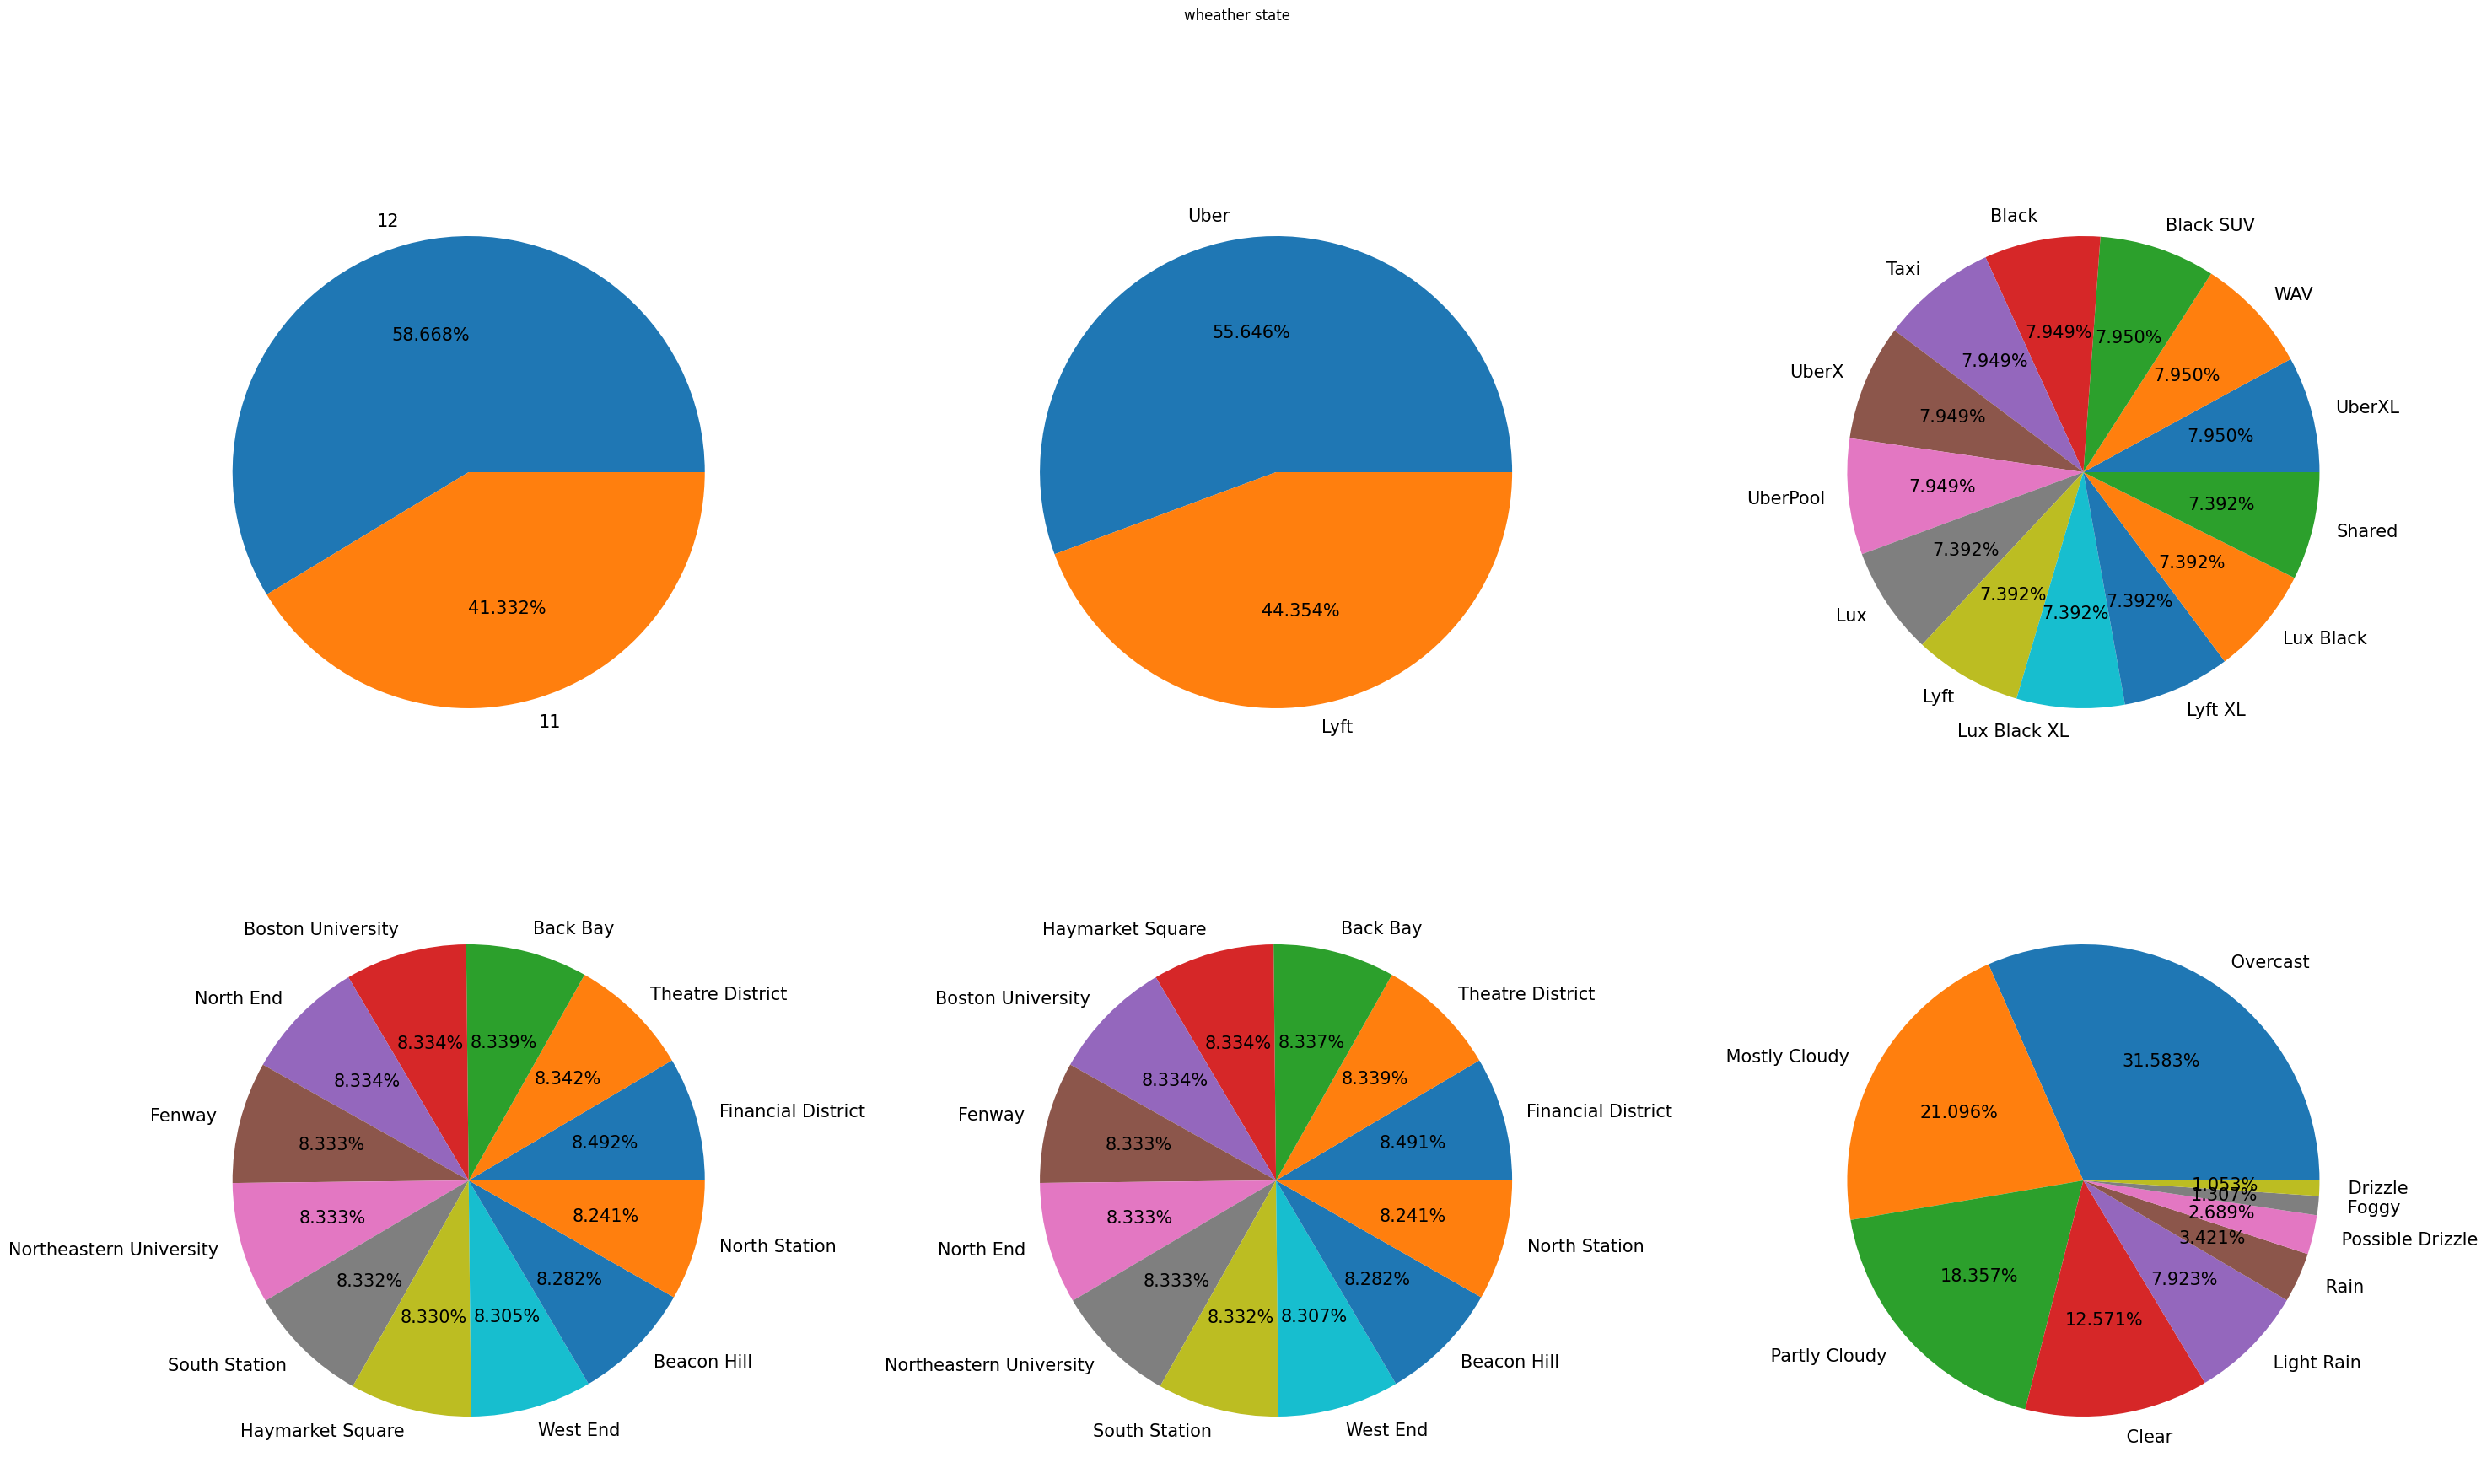

In [28]:
plt.figure(figsize=(35,20))
textprops = {"fontsize":15}
plt.subplot(2,3,1)
#show number of month
plt.suptitle('Number Of Month')
plt.pie(data['month'].value_counts(),labels=list(data['month'].value_counts().index),autopct ='%1.3f%%',textprops=textprops)
plt.subplot(2,3,2)
#show number of cab_type
plt.suptitle('Number Of cab_type')
plt.pie(data['cab_type'].value_counts(),labels=list(data['cab_type'].value_counts().index),autopct ='%1.3f%%',textprops=textprops)
plt.subplot(2,3,3)
#show number of name
plt.suptitle('Number Of cab_type')
plt.pie(data['name'].value_counts(),labels=list(data['name'].value_counts().index),autopct ='%1.3f%%',textprops=textprops)
plt.subplot(2,3,4)
#show number of source
plt.suptitle('Number Of Source')
plt.pie(data['source'].value_counts(),labels=list(data['source'].value_counts().index),autopct ='%1.3f%%',textprops=textprops)
plt.subplot(2,3,5)
#show number of destination
plt.suptitle('Number Of destination')
plt.pie(data['destination'].value_counts(),labels=list(data['destination'].value_counts().index),autopct ='%1.3f%%',textprops=textprops)
plt.subplot(2,3,6)
#show number of wheather state 
plt.suptitle('wheather state ')
plt.pie(data['short_summary'].value_counts(),labels=list(data['short_summary'].value_counts().index),autopct ='%1.3f%%',textprops=textprops)

([<matplotlib.patches.Wedge at 0x21c8d5fcf40>,
 [Text(0.6015157448084366, 0.9209662364861981, ' cloudy '),
  Text(-0.9948399663550234, 0.4693542812660137, ' partly-cloudy-night '),
  Text(-0.7674714304666892, -0.7880276666573415, ' partly-cloudy-day '),
  Text(0.24527090627403705, -1.07230694417947, ' rain '),
  Text(0.9086814945303708, -0.6199176892927414, ' clear-night '),
  Text(1.0772436797481468, -0.22258943021327895, ' clear-day '),
  Text(1.0990725230980083, -0.045161808765570174, ' fog ')],
 [Text(0.3280994971682381, 0.5023452199015626, '31.583%'),
  Text(-0.5426399816481945, 0.25601142614509836, '22.801%'),
  Text(-0.4186207802545577, -0.4298332727221862, '16.651%'),
  Text(0.13378413069492928, -0.5848946968251653, '15.086%'),
  Text(0.4956444515620204, -0.3381369214324043, '8.700%'),
  Text(0.5875874616808073, -0.12141241647997032, '3.871%'),
  Text(0.5994941035080045, -0.024633713872129186, '1.307%')])

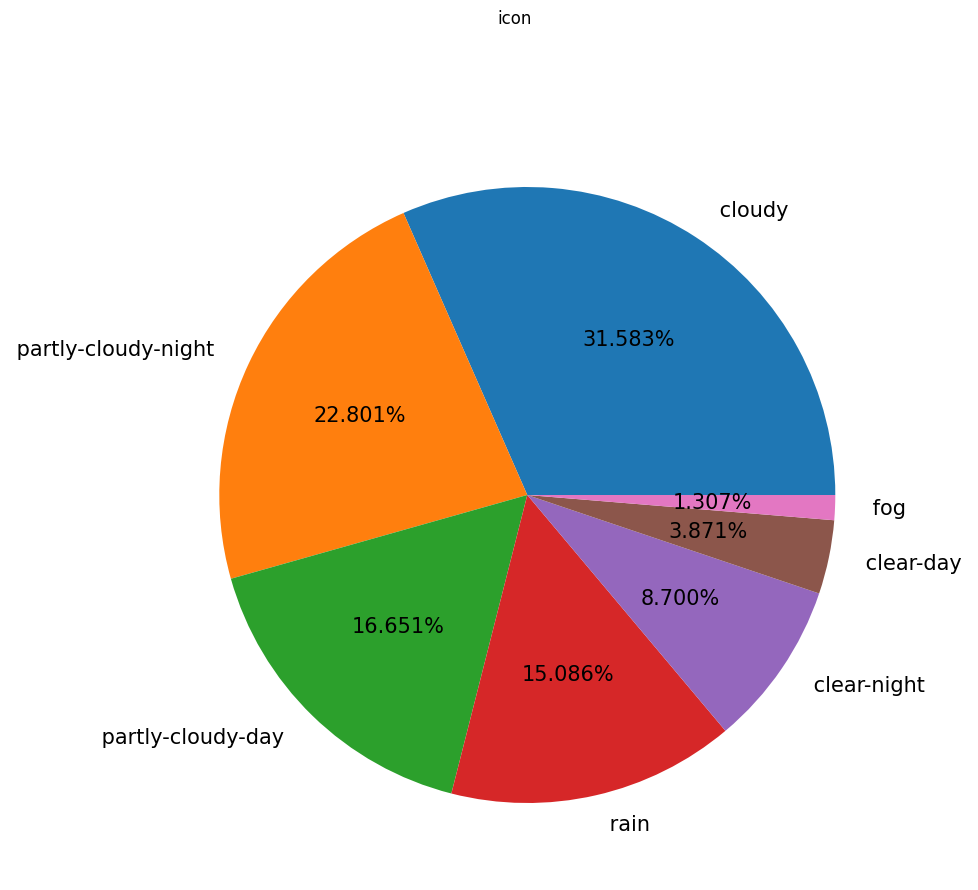

In [29]:
#show number of icon 
plt.figure(figsize=(10,10))
plt.suptitle('icon')
plt.pie(data['icon'].value_counts(),labels=list(data['icon'].value_counts().index),autopct ='%1.3f%%',textprops=textprops)

In [30]:
temp=['timestamp','datetime','long_summary','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax',
             'uvIndexTime','temperatureMinTime','temperatureMaxTime','apparentTemperatureMinTime','apparentTemperatureMaxTime','price']

In [31]:
for col in temp:
    if col=='price':
        continue
    data.drop(col,axis=1,inplace=True)
data   

,id,hour,day,month,timezone,source,destination,cab_type,product_id,name,...,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,...,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,23,1,12,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,23,1,12,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,23,1,12,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,...,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,23,1,12,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000


,hour,day,month,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,price
hour,1.000000,0.066090,-0.079379,-0.067366,0.036089,0.026525,0.330209,0.174129,0.034164,-0.027537,-0.027535,0.020483,0.019940,0.000348
day,0.066090,1.000000,-0.861306,-0.444635,0.092167,-0.041190,-0.011885,0.104992,0.377057,-0.341068,-0.341012,-0.007260,0.145568,-0.000115
month,-0.079379,-0.861306,1.000000,0.589609,-0.135103,-0.016800,-0.012321,0.011493,-0.149333,0.770684,0.770646,-0.452469,-0.213054,0.000369
pressure,-0.067366,-0.444635,0.589609,1.000000,-0.280380,-0.285501,0.004267,0.227912,-0.451178,0.533037,0.532998,-0.528024,-0.243383,0.000514
windBearing,0.036089,0.092167,-0.135103,-0.280380,1.000000,-0.221602,0.114206,0.401978,0.346117,-0.133016,-0.133027,0.262817,-0.555013,-0.000312
cloudCover,0.026525,-0.041190,-0.016800,-0.285501,-0.221602,1.000000,-0.066898,-0.477618,0.042311,-0.080584,-0.080560,0.093997,0.396136,-0.000140
uvIndex,0.330209,-0.011885,-0.012321,0.004267,0.114206,-0.066898,1.000000,0.119842,-0.016625,-0.023806,-0.023808,0.055534,-0.040818,0.000032
visibility.1,0.174129,0.104992,0.011493,0.227912,0.401978,-0.477618,0.119842,1.000000,0.263140,0.152877,0.152864,-0.173903,-0.545052,0.001991
ozone,0.034164,0.377057,-0.149333,-0.451178,0.346117,0.042311,-0.016625,0.263140,1.000000,0.194382,0.194421,-0.229931,-0.223173,0.000504
sunriseTime,-0.027537,-0.341068,0.770684,0.533037,-0.133016,-0.080584,-0.023806,0.152877,0.194382,1.000000,1.000000,-0.844637,-0.210650,0.000490


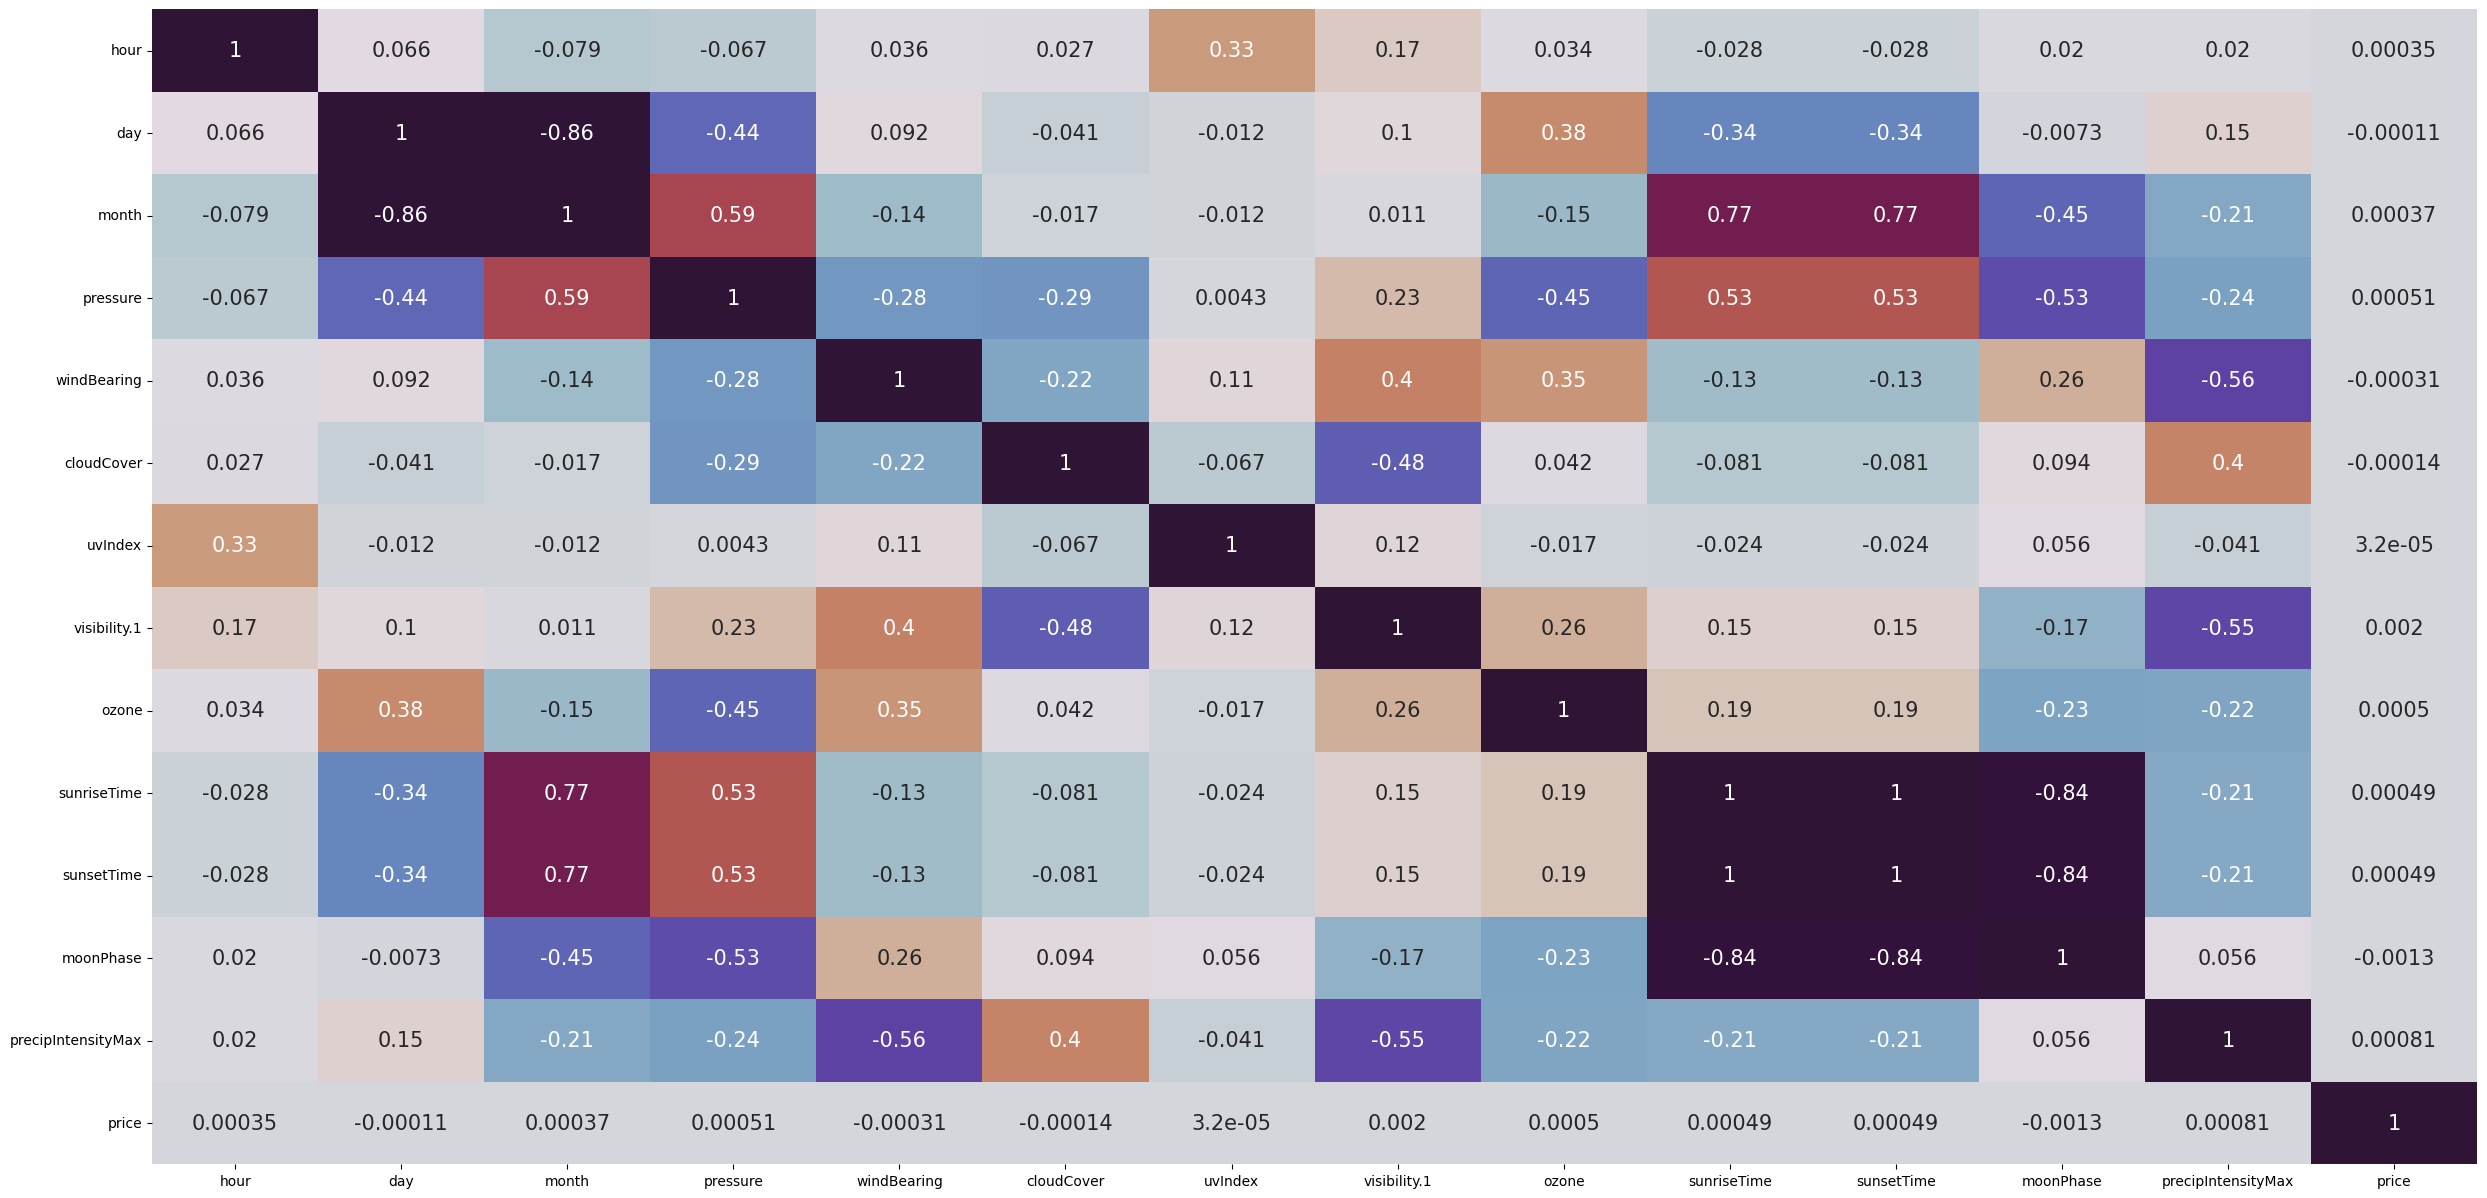

In [32]:
temp=['hour','day','month','pressure','windBearing','cloudCover','uvIndex','visibility.1','ozone','sunriseTime','sunsetTime','moonPhase','precipIntensityMax','price']
plt.figure(figsize=(30,15))
temp_corr=data[temp].corr()
sns.heatmap(temp_corr,annot=True,cmap='twilight_shifted',cbar=False,annot_kws={"size": 15})
temp_corr

,precipIntensity,precipProbability,longitude,price
precipIntensity,1.000000,0.838470,0.130840,-0.000584
precipProbability,0.838470,1.000000,0.122355,-0.000831
longitude,0.130840,0.122355,1.000000,-0.000705
price,-0.000584,-0.000831,-0.000705,1.000000


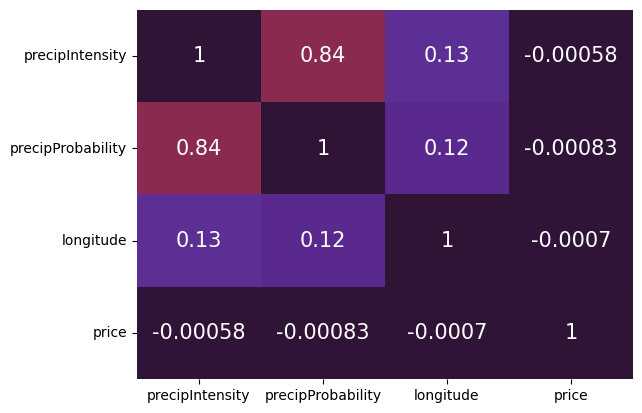

In [33]:
temp=['precipIntensity','precipProbability','longitude','price']
sns.heatmap(data[temp].corr(),annot=True,cmap='twilight_shifted',cbar=False,annot_kws={"size": 15})
data[temp].corr()

In [34]:
for col in temp:
    if col=='price':
        continue
    data.drop(col,axis=1,inplace=True)
data 

,id,hour,day,month,timezone,source,destination,cab_type,product_id,name,...,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,...,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,23,1,12,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,23,1,12,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,23,1,12,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,...,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,23,1,12,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000


In [35]:
feature=['distance','surge_multiplier','name','cab_type']

In [36]:
X=data[feature]
y=data['price']
key=X.keys()

In [37]:
X.isnull().sum()

distance            0
surge_multiplier    0
name                0
cab_type            0
dtype: int64

In [38]:
y=data["price"]

In [39]:
k=y.median()
k

13.5

In [40]:
data["price"]=data["price"].fillna(k)

In [41]:
data["price"].isnull().sum()

0

In [42]:
str_col=['cab_type','name']
label = LabelEncoder()
for col in str_col:
    X[col]=label.fit_transform(X[col])
X

C:\Users\hp\AppData\Local\Temp\ipykernel_34760\3357121580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=label.fit_transform(X[col])
C:\Users\hp\AppData\Local\Temp\ipykernel_34760\3357121580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=label.fit_transform(X[col])


,distance,surge_multiplier,name,cab_type
0,0.44,1.0,7,0
1,0.44,1.0,2,0
2,0.44,1.0,5,0
3,0.44,1.0,4,0
4,0.44,1.0,6,0
...,...,...,...,...
693066,1.00,1.0,11,1
693067,1.00,1.0,10,1
693068,1.00,1.0,8,1
693069,1.00,1.0,1,1


In [43]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=5, random_state=33)
SelectedParameters = {'max_depth':[5,10,15,20,25]}
GridSearchModel = GridSearchCV(RandomForestRegressorModel,SelectedParameters, cv = 2,return_train_score=True)
GridSearchModel.fit(X, y)
print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)
print('Best Estimator is :', GridSearchModel.best_estimator_)

Best Score is : 0.9720262951753063
Best Parameters are : {'max_depth': 15}
Best Estimator is : RandomForestRegressor(max_depth=15, random_state=33)


In [44]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=33, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (589110, 4)
X_test shape is  (103961, 4)
y_train shape is  (589110,)
y_test shape is  (103961,)


In [45]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=15, random_state=33)
RandomForestRegressorModel.fit(X_train,y_train)
print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
#print('Random Forest Regressor No. of features are : ' , RandomForestRegressorModel.n_features_)

Random Forest Regressor Train Score is :  0.9737990295758208
Random Forest Regressor Test Score is :  0.972578397827891


In [46]:
y_pred = RandomForestRegressorModel.predict(X_test)
y_pred

array([ 4.00700826, 34.00927349,  0.        , ..., 13.50227225,
        6.84246202,  7.13108185])

In [47]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Squared Error Value is : ', MSEValue)
#Calculating Median Absolute Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Absolute Error Value is : ', MdSEValue )

Mean Absolute Error Value is :  1.0381222214383192
Mean Squared Error Value is :  2.745485371789363
Median Absolute Error Value is :  0.7151549360247742


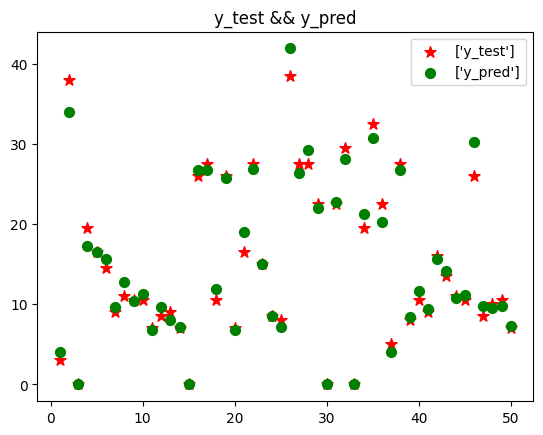

In [48]:
plt.title('y_test && y_pred')
plt.scatter(x=range(1,51),y=y_test[:50],marker='*',c='r',s=70,label=['y_test'])
plt.scatter(x=range(1,51),y=y_pred[:50],marker='o',c='g',s=50,label=['y_pred'])
plt.legend()